In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [2]:
%run feature-probability-generation.ipynb 

distribution-generator.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "C:\\Users\\ramka\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py:14: SettingWithCopyWarning: \n",
distribution-generator.ipynb:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "A value is trying to be set on a copy of a slice from a DataFrame.\n",
distribution-generator.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [46]:
X = white_wine_new.drop(['quality'], axis=1)
y = white_wine_new['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,density_prob_low,total_sulfur_dioxide_prob_low,free_sulfur_dioxide_prob_low,chlorides_prob_low,residual_sugar_prob_low,citric_acid_prob_low,volatile_acidity_prob_low,fixed_acidity_prob_low,sulphates_prob_low,pH_prob_low
3343,6.9,0.36,0.28,13.55,0.048,51.0,189.0,0.99782,3.00,0.60,...,0.0039,0.0257,0.0009,0.4274,0.0000,0.3060,0.2849,0.3002,0.0018,0.0002
736,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,...,0.0032,0.0468,0.0076,0.3227,0.0000,0.3081,0.0058,0.1423,0.2861,0.0008
1406,8.2,0.22,0.36,6.80,0.034,12.0,90.0,0.99440,3.01,0.38,...,0.3194,0.0998,0.2110,0.0107,0.0545,0.1334,0.0003,0.0078,0.0051,0.0005
1719,5.8,0.23,0.27,1.80,0.043,24.0,69.0,0.99330,3.38,0.31,...,0.2068,0.0106,0.2416,0.3298,0.3184,0.2830,0.0009,0.0005,0.0001,0.0009
2163,8.5,0.25,0.27,4.70,0.031,31.0,92.0,0.99220,3.01,0.33,...,0.0240,0.1212,0.0904,0.0014,0.1622,0.2830,0.0058,0.0012,0.0001,0.0005


In [5]:
#Knn classifier
from sklearn.neighbors import KNeighborsClassifier

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'alcohol_prob', 'pH', 'sulphates', 'citric acid', 'density_prob', 'residual sugar', 'total_sulfur_dioxide_prob', 'free_sulfur_dioxide_prob', 'chlorides_prob', 'residual_sugar_prob', 'citric_acid_prob', 'volatile_acidity_prob', 'fixed_acidity_prob', 'sulphates_prob', 'pH_prob'] ]

ks = [2,3,4,5,6,7]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[1, 2, 3]))
    print("accuracy score is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[1, 2, 3]))/1470) + ".")
    

For a k value = 2 : 
[[ 16  44   2]
 [ 61 954  56]
 [  2 239  96]]
accuracy score is: 0.7251700680272108.
For a k value = 3 : 
[[  7  51   4]
 [ 23 931 117]
 [  6 180 151]]
accuracy score is: 0.7408163265306122.
For a k value = 4 : 
[[  8  51   3]
 [ 16 989  66]
 [  2 227 108]]
accuracy score is: 0.7517006802721088.
For a k value = 5 : 
[[  5  52   5]
 [ 10 962  99]
 [  1 206 130]]
accuracy score is: 0.7462585034013606.
For a k value = 6 : 
[[   4   56    2]
 [  13 1004   54]
 [   0  255   82]]
accuracy score is: 0.7414965986394558.
For a k value = 7 : 
[[  2  58   2]
 [  1 994  76]
 [  0 230 107]]
accuracy score is: 0.7503401360544217.


In [6]:
"""#knn classification taking features that seem to be strong high quality indicators

X_train = X_train[ ['alcohol', 'density', 'alcohol_prob', 'density_prob', 'total_sulfur_dioxide_prob', 'free_sulfur_dioxide_prob', 'chlorides_prob', 'residual_sugar_prob', 'citric_acid_prob', 'volatile_acidity_prob', 'fixed_acidity_prob', 'sulphates_prob', 'pH_prob'] ]

ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")
    """

'#knn classification taking features that seem to be strong high quality indicators\n\nX_train = X_train[ [\'alcohol\', \'density\', \'alcohol_prob\', \'density_prob\', \'total_sulfur_dioxide_prob\', \'free_sulfur_dioxide_prob\', \'chlorides_prob\', \'residual_sugar_prob\', \'citric_acid_prob\', \'volatile_acidity_prob\', \'fixed_acidity_prob\', \'sulphates_prob\', \'pH_prob\'] ]\n\nks = [2,3,4,5,6,7]\n\nfor k in ks:    \n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    y_pred = knn.predict(X_test)\n    print("For a k value = " + str(k) + " : ")\n    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")\n    '

In [7]:
#knn classification taking features that seem to be strong low quality indicators
"""
X_train = X_train[ ['free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]

ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")
    """

'\nX_train = X_train[ [\'free sulfur dioxide\', \'volatile acidity\', \'fixed acidity\'] ]\n\nks = [2,3,4,5,6,7]\n\nfor k in ks:    \n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    y_pred = knn.predict(X_test)\n    print("For a k value = " + str(k) + " : ")\n    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")\n    '

In [8]:
#knn classification taking features that seem to be strong all around quality indicators
"""
X_train = X_train[ ['chlorides', 'residual sugar'] ]

ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")
    """

'\nX_train = X_train[ [\'chlorides\', \'residual sugar\'] ]\n\nks = [2,3,4,5,6,7]\n\nfor k in ks:    \n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    y_pred = knn.predict(X_test)\n    print("For a k value = " + str(k) + " : ")\n    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")\n    '

The best knn classification so far is a 7 neighbor classifier on the 'alcohol' and 'density' features.

In [30]:
from sklearn import linear_model

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]

solvers = ['newton-cg', 'sag', 'saga', 'lbfgs' ]
for solver in solvers:
    mulnom_clf = linear_model.LogisticRegression(multi_class='multinomial', solver=solver)
    mulnom_clf.fit(X_train, y_train)
    y_pred_mulnom = mulnom_clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))
    print("accuracy score is: " + str(np.trace(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))/1470) + ".")
    


[[   2   59    1]
 [   1 1000   70]
 [   0  222  115]]
accuracy score is: 0.7598639455782313.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[   0   61    1]
 [   0 1051   20]
 [   0  318   19]]
accuracy score is: 0.7278911564625851.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[   0   61    1]
 [   0 1060   11]
 [   0  332    5]]
accuracy score is: 0.7244897959183674.
[[   0   60    2]
 [   0 1006   65]
 [   0  239   98]]
accuracy score is: 0.7510204081632653.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
"""from sklearn import linear_model

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs' ]
for solver in solvers:
    mulnom_clf = linear_model.LogisticRegression(multi_class='multinomial', solver=solver)
    mulnom_clf.fit(X_train, y_train)
    y_pred_mulnom = mulnom_clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))) + ".")
"""

'from sklearn import linear_model\n\n#X_train = X_train[ [\'alcohol\', \'density\', \'total sulfur dioxide\', \'free sulfur dioxide\', \'volatile acidity\', \'fixed acidity\'] ]\nsolvers = [\'newton-cg\', \'sag\', \'saga\', \'lbfgs\' ]\nfor solver in solvers:\n    mulnom_clf = linear_model.LogisticRegression(multi_class=\'multinomial\', solver=solver)\n    mulnom_clf.fit(X_train, y_train)\n    y_pred_mulnom = mulnom_clf.predict(X_test)\n    print(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_mulnom, labels=[1, 2, 3]))) + ".")\n'

In [11]:
"""X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]

estimatators = [10, 20,  30, 40, 50, 60, 70, 80, 90, 100 ]
for estimator in estimatators:
    grad_boost_clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=estimator)
    grad_boost_clf.fit(X_train, y_train)
    y_pred_grad_boost = grad_boost_clf.predict(X_test)
    print("For n_estimators = " + str(estimator) + ".")
    print(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")
    print("---------------------------------------------------------------------------------------------------------")
"""

'X_train = X_train[ [\'alcohol\', \'density\', \'total sulfur dioxide\', \'free sulfur dioxide\', \'volatile acidity\', \'fixed acidity\'] ]\n\nestimatators = [10, 20,  30, 40, 50, 60, 70, 80, 90, 100 ]\nfor estimator in estimatators:\n    grad_boost_clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=estimator)\n    grad_boost_clf.fit(X_train, y_train)\n    y_pred_grad_boost = grad_boost_clf.predict(X_test)\n    print("For n_estimators = " + str(estimator) + ".")\n    print(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")\n    print("---------------------------------------------------------------------------------------------------------")\n'

Random forrest has perfromed the best out of all the classifiers. I will continue to use random forrest and tweak it further.

In [12]:
from sklearn.ensemble import RandomForestClassifier


#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]


estimators = list(range(50, 3000, 100))
points = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3])) )
    

It seems the more features I have the better the classifier.

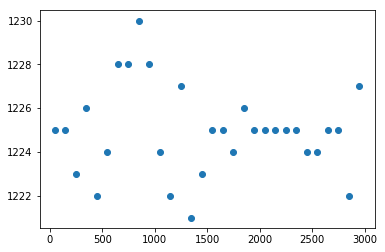

In [13]:
plt.figure()
plt.scatter(points.keys(), points.values())
plt.show()

In [14]:
"""from sklearn.ensemble import RandomForestClassifier

#X_train = X_train[ ['alcohol', 'density'] ]

estimators = list(range(50, 3000, 100))
points_high_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_high_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])))/980
    """

"from sklearn.ensemble import RandomForestClassifier\n\n#X_train = X_train[ ['alcohol', 'density'] ]\n\nestimators = list(range(50, 3000, 100))\npoints_high_indicators = {}\nfor estimator in estimators:\n    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)\n    ran_fores_clf.fit(X_train, y_train)\n    y_pred_ran_fores = ran_fores_clf.predict(X_test)\n    points_high_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])))/980\n    "

In [15]:
"""plt.figure()
plt.scatter(points_high_indicators.keys(), points_high_indicators.values())
plt.show()"""

'plt.figure()\nplt.scatter(points_high_indicators.keys(), points_high_indicators.values())\nplt.show()'

In [16]:
"""from sklearn.ensemble import RandomForestClassifier

X_train = X_train[ ['free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]

estimators = list(range(50, 3000, 100))
points_low_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_low_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980
    """

"from sklearn.ensemble import RandomForestClassifier\n\nX_train = X_train[ ['free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]\n\nestimators = list(range(50, 3000, 100))\npoints_low_indicators = {}\nfor estimator in estimators:\n    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)\n    ran_fores_clf.fit(X_train, y_train)\n    y_pred_ran_fores = ran_fores_clf.predict(X_test)\n    points_low_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980\n    "

In [17]:
"""plt.figure()
plt.scatter(points_low_indicators.keys(), points_low_indicators.values())
plt.show()"""

'plt.figure()\nplt.scatter(points_low_indicators.keys(), points_low_indicators.values())\nplt.show()'

In [18]:
"""from sklearn.ensemble import RandomForestClassifier

X_train = X_train[ ['chlorides', 'residual sugar'] ]

estimators = list(range(50, 3000, 100))
points_three_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_three_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980
    """

"from sklearn.ensemble import RandomForestClassifier\n\nX_train = X_train[ ['chlorides', 'residual sugar'] ]\n\nestimators = list(range(50, 3000, 100))\npoints_three_indicators = {}\nfor estimator in estimators:\n    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)\n    ran_fores_clf.fit(X_train, y_train)\n    y_pred_ran_fores = ran_fores_clf.predict(X_test)\n    points_three_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980\n    "

In [19]:
"""plt.figure()
plt.scatter(points_three_indicators.keys(), points_three_indicators.values())
plt.show()"""

'plt.figure()\nplt.scatter(points_three_indicators.keys(), points_three_indicators.values())\nplt.show()'

In [20]:
"""from sklearn.ensemble import RandomForestClassifier

X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]

estimators = list(range(50, 3000, 100))
points_all = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_all[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980
    """

"from sklearn.ensemble import RandomForestClassifier\n\nX_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]\n\nestimators = list(range(50, 3000, 100))\npoints_all = {}\nfor estimator in estimators:\n    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)\n    ran_fores_clf.fit(X_train, y_train)\n    y_pred_ran_fores = ran_fores_clf.predict(X_test)\n    points_all[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980\n    "

In [21]:
"""plt.figure()
plt.scatter(points_all.keys(), points_all.values())
plt.show()"""

'plt.figure()\nplt.scatter(points_all.keys(), points_all.values())\nplt.show()'

1150 estimators seems to be the optimal estimator amount.

In [31]:
#max_feature parameter tuning
from sklearn.ensemble import RandomForestClassifier

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]

parameters = ['sqrt', 'log2', 'auto']
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features=param)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For max_feature parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )
    
    

For max_feature parameter 'sqrt' we have score 0.8340136054421768.
For max_feature parameter 'log2' we have score 0.8340136054421768.
For max_feature parameter 'auto' we have score 0.8353741496598639.


The best max_feature parameter is 'auto'.

In [32]:
#criterion parameter tuning
from sklearn.ensemble import RandomForestClassifier

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]

parameters = ['gini', 'entropy']
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features='auto', criterion=param )
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For criterion parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


For criterion parameter 'gini' we have score 0.8326530612244898.
For criterion parameter 'entropy' we have score 0.8353741496598639.


The best criterion parameter is 'entropy'.

In [33]:
#bootstrap  parameter tuning

from sklearn.ensemble import RandomForestClassifier

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]

parameters = [True, False]
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features='auto', criterion='entropy', bootstrap=param )
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For bootstrap parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


For bootstrap parameter 'True' we have score 0.8360544217687075.
For bootstrap parameter 'False' we have score 0.8414965986394558.


The best bootstrap parameter is 'False'.

In [40]:
from sklearn.ensemble import RandomForestClassifier

#X_train = X_train[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]

ran_fores_clf = RandomForestClassifier(n_estimators=1450, max_features='auto', criterion='entropy', bootstrap=False )
ran_fores_clf.fit(X_train, y_train)
y_pred_ran_fores = ran_fores_clf.predict(X_test)
print( "My best classifier yeilds an accuracy of " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


My best classifier yeilds an accuracy of 0.8428571428571429.


In [36]:
from sklearn.ensemble import RandomForestClassifier

estimators = list(range(50, 3000, 100))
points = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator, max_features='auto', criterion='entropy', bootstrap=False )
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3])) )

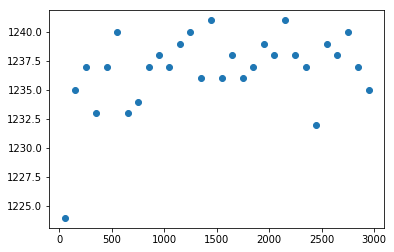

In [37]:
plt.figure()
plt.scatter(points.keys(), points.values())
plt.show()

In [39]:
points[1450]

1241

In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train_high = X_train[ ['alcohol', 'alcohol_prob_high', 'density', 'density_prob_high', 'density_prob_mid', 'density_prob_low', 'alcohol_prob_mid', 'alcohol_prob_low' ] ]
X_test_high = X_test[ ['alcohol', 'alcohol_prob_high', 'density', 'density_prob_high', 'density_prob_mid', 'density_prob_low', 'alcohol_prob_mid', 'alcohol_prob_low' ] ]

ran_fores_clf = RandomForestClassifier(n_estimators=1450, max_features='auto', criterion='entropy', bootstrap=False )
ran_fores_clf.fit(X_train_high, y_train)
y_pred_ran_fores = ran_fores_clf.predict(X_test_high)
print( "accuracy " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


accuracy 0.7591836734693878.


In [48]:
 from sklearn.ensemble import RandomForestClassifier

X_train_low = X_train[ ['chlorides', 'chlorides_prob_low', 'chlorides_prob_mid', 'chlorides_prob_high', 'residual sugar', 'residual_sugar_prob_low', 'residual_sugar_prob_mid', 'residual_sugar_prob_high'] ]
X_test_low = X_test[ ['chlorides', 'chlorides_prob_low', 'chlorides_prob_mid', 'chlorides_prob_high', 'residual sugar', 'residual_sugar_prob_low', 'residual_sugar_prob_mid', 'residual_sugar_prob_high'] ]

ran_fores_clf = RandomForestClassifier(n_estimators=1450, max_features='auto', criterion='entropy', bootstrap=False )
ran_fores_clf.fit(X_train_low, y_train)
y_pred_ran_fores = ran_fores_clf.predict(X_test_low)
print( "accuracy " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


accuracy 0.7285714285714285.


In [49]:
 from sklearn.ensemble import RandomForestClassifier

X_train_lo = X_train[ ['volatile acidity', 'volatile_acidity_prob_low', 'volatile_acidity_prob_mid', 'volatile_acidity_prob_high', 'fixed acidity', 'fixed_acidity_prob_low', 'fixed_acidity_prob_mid', 'fixed_acidity_prob_high', 'free sulfur dioxide', 'free_sulfur_dioxide_prob_low', 'free_sulfur_dioxide_prob_mid', 'free_sulfur_dioxide_prob_high'] ]
X_test_lo = X_test[ ['volatile acidity', 'volatile_acidity_prob_low', 'volatile_acidity_prob_mid', 'volatile_acidity_prob_high', 'fixed acidity', 'fixed_acidity_prob_low', 'fixed_acidity_prob_mid', 'fixed_acidity_prob_high', 'free sulfur dioxide', 'free_sulfur_dioxide_prob_low', 'free_sulfur_dioxide_prob_mid', 'free_sulfur_dioxide_prob_high'] ]

ran_fores_clf = RandomForestClassifier(n_estimators=1450, max_features='auto', criterion='entropy', bootstrap=False )
ran_fores_clf.fit(X_train_lo, y_train)
y_pred_ran_fores = ran_fores_clf.predict(X_test_lo)
print( "accuracy " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[1, 2, 3]))/1470) + "." )


accuracy 0.7646258503401361.
